In [41]:
%load_ext autoreload

%autoreload 2

import sys
sys.path.append('material')
from auxiliary import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## TODO

* Maybe it would be nice to generate the illustrative LALONDE dataset at the beginning of class.
* This needs to be amended so that all parameters on the same line as is the case in an experiment.

# Potential outcome model

## Individual-specific effect of treatment

It would be great if we could get our hands on the individual-specific effect of treatment.

\begin{align*}
\delta_i = y_1^i - y_1^i
\end{align*}

* Why do individuals have potentially different effects of treatment?

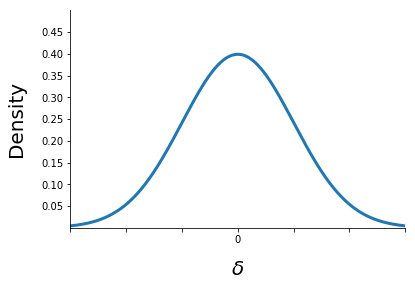

In [55]:
plot_individual_specific_effects()

* There might be considerable heterogeneity in the benefits of treatment among the population. And summarizing the distribution of benefits with a single number, for example $E[\delta]$, might result in a loss of information.

**Examples**

* medical treatment
* ..

Give our definitions of $(Y^1, Y^0, D)$ and their individual realizations $(y^1_i, y^0_i, d_i)$ we can now define the observed outcome $Y$ in terms of them.

\begin{align*}
Y = \begin{cases}
Y^1 & \quad\text{if}\quad D = 1 \\
Y^0 & \quad\text{if}\quad D = 0
\end{cases}
\end{align*}

or more compactly in switching-regime notation

\begin{align*}
Y = D Y^1 + (1 - D) Y^0.
\end{align*}

This leads Holland (1986) to describe the fundamental problem of causal inference:

<img src="material/fundamental_problem.png" height="500" width=500 />

$\rightarrow$ as only the diagonal of the table is observable we cannot simply compute $\delta_i$ by taking the difference in potential outcomes $(y^1_i, y^0_i)$.

In [52]:
df = get_illustrative_lalonde_data()
df.head()

,treat,re78,Y,Y_0,Y_1,D
281,0,0.000000,0.000000,0.000000,NaN,0
162,1,0.000000,0.000000,NaN,0.000000,1
422,0,3523.577881,3523.577881,3523.577881,NaN,0
131,1,60307.929688,60307.929688,NaN,60307.929688,1
138,1,0.000000,0.000000,NaN,0.000000,1


It looks like we need to give our our hope of obtaining the individual-specific effect of treatment. But what can we still hope for?

$\rightarrow$ population-level parameters

* What are common examples?

* What are the policy questions they address?

* What is their relationship to each other?

\begin{align*}
\begin{array}{lll}
E[Y^1 - Y^0] & \qquad ATE & \qquad\text{average effect of treatment} \\
E[Y^1 - Y^0 \mid D = 1] & \qquad ATT & \qquad\text{average effect on treated} \\
E[Y^1 - Y^0 \mid D = 0] & \qquad ATC & \qquad\text{average effect on untreated}
\end{array}
\end{align*}

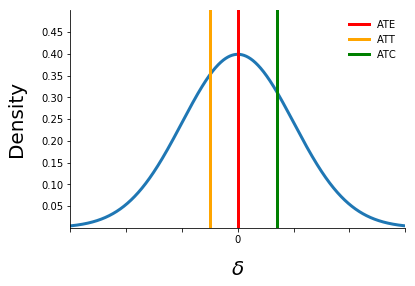

In [113]:
plot_individual_specific_effects(with_parameters=[0, 0.7, -0.5])

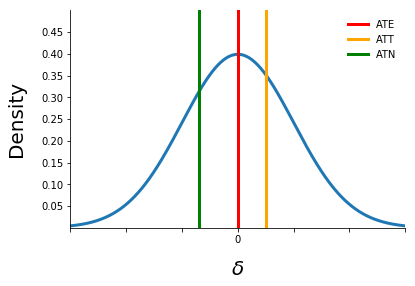

In [109]:
plot_individual_specific_effects(with_parameters=[0, -0.7, 0.5])

The potential outcome model is gets its empirical tractability when combined with the **Stable Unit Treatment Value Assumption (SUTVA)** of which there exist many formulations. We will go with the one from Imbens and Rubin (2015):

> The potential outcomes for any unit do not vary with the treatments assigned to other units, and, for each unit there are no different forms or versions of each treatment level, which lead to different potential outcomes.

* When do we need to expect this is vioated?


<img src="material/stable_unit_treatment.png" height="500" width=500 />

* randomized experiment

\begin{align*}
(Y^0, Y^1)  \perp \!\!\! \perp D
\end{align*}

* observational study

> A *observational study* is an empirical investigation of treatments, policies, or exposures and the effects they cause, but it differs from an experiment in that the investigator cannot control the assingment of treatments to subjects. (Rosenbaum (2002))

\begin{align*}
\hat{\delta}_{NAIVE} = E_N[y_i\mid d_i = 1] - E_N[y_i\mid d_i = 0]
\end{align*}

where 

\begin{align*}
E_N[y_i\mid d_i = 1] \xrightarrow{p} E[Y^1\mid D = 1] \neq E[Y^1]\\
E_N[y_i\mid d_i = 0] \xrightarrow{p} E[Y^0\mid D = 0] \neq E[Y^0]
\end{align*}

\begin{align*}
E[\delta] & = \{\pi E[Y^1\mid D = 1] + (1 - \pi)E[Y^1\mid D = 0]\} \\
          & - \{\pi E[Y^0\mid D = 1] + (1 - \pi)E[Y^0\mid D = 0]\}
\end{align*}


* Which components can be easily computed from data?

\begin{align*}
E[Y^1 \mid D = 1] - E[Y^0 \mid D = 0] & = E[\delta] + \{E[Y^0\mid D= 1] - E[Y^0\mid D= 0]\} \\
                                      & + (1 - \pi) \{E[\delta \mid D = 1] -E[\delta \mid D = 0]\}
\end{align*}

* baseline bias
* differential treatment effect bias

<img src="material/bias_example.png" height="500" width=500 />

What assumptions suffice to estimate the ATE with the navie estimator?

* assumptions about potential outcomes for subsets of the population defined by treatment status
* assumptions about the treatment selection / assignment process 

Consider the following two assumptions:

\begin{align*}
E[Y^1\mid D = 1] = E[Y^1\mid D = 0] \\
E[Y^0\mid D = 1] = E[Y^0\mid D = 0] \\
\end{align*}

and recall our naive estimate 


\begin{align*}
\hat{\delta}_{NAIVE} & = E_N[y_i\mid d_i = 1] - E_N[y_i\mid d_i = 0] \\
                     & \xrightarrow{p} E[Y^1\mid D = 1] - E[Y^0\mid D = 0] 
\end{align*}

* What happeens if the two assumptions or at least one is satisfied?


## Extensions of the binary potential outcome model

* over-time potential outcomes and causal effects
    * a single unit over time (time series)
    * many units over time (panel data)
    
* many-valued treatments

### Over-time potential outcomes

We explore the case of a single unit over time.

In [80]:
import wbdata
countries = ["JP"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'SP.DYN.CBRT.IN':'Birth rate'}
 
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
df.sort_index(inplace=True)
df.index = df.index.astype(int)

Text(0.5, 0, 'Year')

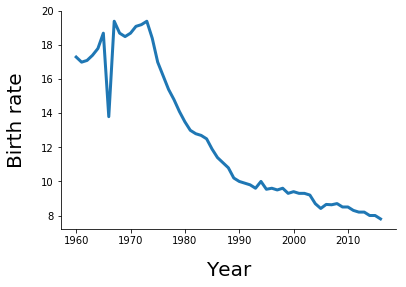

In [81]:
x = df['Birth rate'].index
y = df['Birth rate']

fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
ax.set_ylabel('Birth rate')
ax.set_xlabel('Year')

In [82]:
df.loc[slice(1960, 1970), 'Birth rate']

date
1960    17.3
1961    17.0
1962    17.1
1963    17.4
1964    17.8
1965    18.7
1966    13.8
1967    19.4
1968    18.7
1969    18.5
1970    18.7
Name: Birth rate, dtype: float64

In [83]:
y_0 = df.loc[[1963, 1969], 'Birth rate'].mean()
y_1 = df.loc[1966, 'Birth rate']
print(' A reasonable treatment effect is {:10.5f}'.format(y_1 - y_0))

 A reasonable treatment effect is   -4.15000


## Missing data and imputation

In [84]:
df_base = pd.read_pickle('../../datasets/processed/angrist_pischke/nswre74.pkl')
df_base = df_base.sample(frac=1)
df_base.head()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
199,0,20,8,1,0,0,1,0.0,0.0,0.000000,400.0
84,1,27,8,1,0,0,1,0.0,0.0,0.000000,729.0
36,1,25,5,1,0,0,1,0.0,0.0,6181.879883,625.0
300,0,25,10,1,0,1,1,0.0,0.0,0.000000,625.0
99,1,31,9,0,1,0,1,0.0,0.0,26817.599609,961.0


Let's map the dataset into our framework of the potential outcome model.

In [85]:
is_treated = df_base['treat'] == 1

df_base['Y'] = df_base['re78']
df_base['Y_0'] = df_base.loc[~is_treated, 're78']
df_base['Y_1'] = df_base.loc[is_treated, 're78']

df_base['D'] = 0
df_base.loc[is_treated, 'D'] = 1
df_base = df_base[['Y_1', 'Y_0', 'D']]
df_base.head()

,Y_1,Y_0,D
199,NaN,0.0,0
84,0.000000,NaN,1
36,6181.879883,NaN,1
300,NaN,0.0,0
99,26817.599609,NaN,1


#### A naive approach

We can impute the missing values simply by their average counterpart.

In [86]:
df_base.loc[~is_treated, 'Y_1'] = df_base['Y_1'].mean()
df_base.loc[is_treated, 'Y_0'] = df_base['Y_0'].mean()
print('Our estimated treatment effect is {:10.2f}'.format((df_base['Y_1'] - df_base['Y_0']).mean()))

Our estimated treatment effect is    1794.34


#### A more sophisticated approach

We can account for the randomness by repeated sampling from the empirical distribution of the potential outcomes. We will still discuss its limitations further below.

Our estimated treatment effect is    1796.53
Our estimated treatment effect is    1433.38
Our estimated treatment effect is    2402.10
Our estimated treatment effect is    1913.57
Our estimated treatment effect is    1944.43
Our estimated treatment effect is    1347.53
Our estimated treatment effect is    1866.44
Our estimated treatment effect is    1866.84
Our estimated treatment effect is    2164.47
Our estimated treatment effect is    1518.42
Our estimated treatment effect is    1714.46
Our estimated treatment effect is    1632.23
Our estimated treatment effect is    1928.08
Our estimated treatment effect is    2259.05
Our estimated treatment effect is    1778.19
Our estimated treatment effect is    1855.32
Our estimated treatment effect is    2129.27
Our estimated treatment effect is    1711.11
Our estimated treatment effect is    1802.65
Our estimated treatment effect is    1640.11
Our estimated treatment effect is    2074.58
Our estimated treatment effect is    1987.18
Our estima

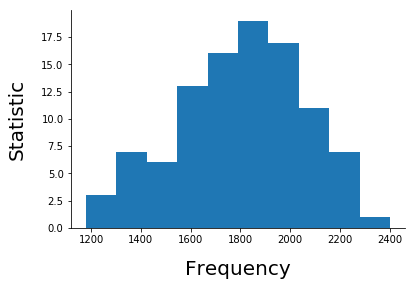

In [87]:
status_counts = df_base['D'].value_counts().to_dict()

stats = list()
for _ in range(100):
    y_1_sampled = df_base['Y_1'].dropna().sample(n=status_counts[0], replace=True).values
    y_0_sampled = df_base['Y_0'].dropna().sample(n=status_counts[1], replace=True).values

    df_boot = df_base.copy()

    df_boot.loc[df_boot['D'] == 1, 'Y_0'] = y_0_sampled
    df_boot.loc[df_boot['D'] == 0, 'Y_1'] = y_1_sampled
    
    stat = (df_boot['Y_1'] - df_boot['Y_0']).mean()
    stats.append(stat)
    print('Our estimated treatment effect is {:10.2f}'.format(stat))
    
fig, ax = plt.subplots(1, 1)
ax.hist(stats)
ax.set_ylabel('Statistic')
ax.set_xlabel('Frequency');

Still some limitations remains. For example, we do sample from the empirical distribution of the observed outcomes and the actual distribution. Phrased differently, we treat the distribution of potential outcomes as knows and abstract from any uncertainty in our knowledge about it.